In [4]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis

from datetime import datetime,date #for cleaning the dates

In [5]:
music_df = pd.read_csv('STCD_data.csv', low_memory=False)

music_df.head()

,Name,Artist,Genre,Year,Date Added,Last Played,Plays
0,Santeria,Sublime,Alternative,1996.0,"5/11/12, 8:56 PM","7/28/20, 12:05 PM",314.0
1,Take On Me,a-ha,Pop,1985.0,"9/10/18, 12:40 PM","7/9/20, 2:43 PM",220.0
2,Take On Me,a-ha,Pop,1985.0,"9/10/18, 12:40 PM","7/9/20, 2:43 PM",220.0
3,Cliffs of Dover,Eric Johnson,Rock,1990.0,"8/16/17, 2:52 PM","8/2/20, 5:21 PM",184.0
4,What I'm Here 4,Gang Starr,Hip-Hop/Rap,1998.0,"12/2/16, 2:17 AM","8/2/20, 5:11 PM",172.0


In [8]:
#Remove times from dates
music_df['Date Added'] = pd.to_datetime(music_df['Date Added']).dt.date

music_df['Last Played'] = pd.to_datetime(music_df['Last Played']).dt.date

In [9]:
music_df.head()

,Name,Artist,Genre,Year,Date Added,Last Played,Plays
0,Santeria,Sublime,Alternative,1996.0,2012-05-11,2020-07-28,314.0
1,Take On Me,a-ha,Pop,1985.0,2018-09-10,2020-07-09,220.0
2,Take On Me,a-ha,Pop,1985.0,2018-09-10,2020-07-09,220.0
3,Cliffs of Dover,Eric Johnson,Rock,1990.0,2017-08-16,2020-08-02,184.0
4,What I'm Here 4,Gang Starr,Hip-Hop/Rap,1998.0,2016-12-02,2020-08-02,172.0


In [17]:
music_df.fillna(0)

,Name,Artist,Genre,Year,Date Added,Last Played,Plays
0,Santeria,Sublime,Alternative,1996.0,2012-05-11,2020-07-28,314.0
1,Take On Me,a-ha,Pop,1985.0,2018-09-10,2020-07-09,220.0
2,Take On Me,a-ha,Pop,1985.0,2018-09-10,2020-07-09,220.0
3,Cliffs of Dover,Eric Johnson,Rock,1990.0,2017-08-16,2020-08-02,184.0
4,What I'm Here 4,Gang Starr,Hip-Hop/Rap,1998.0,2016-12-02,2020-08-02,172.0
...,...,...,...,...,...,...,...
166,Let Me Blow Ya Mind (feat. Gwen Stefani),Eve,Hip-Hop/Rap,2001.0,2019-09-17,0,0.0
167,Centerfold,The J. Geils Band,Rock,1981.0,2019-03-18,0,0.0
168,Brandy (You're A Fine Girl),Looking Glass,Pop,1972.0,2019-03-18,0,0.0
169,Ho Hey,The Lumineers,Alternative,2012.0,2019-02-06,0,0.0


In [20]:
import matplotlib.pyplot as plt

<BarContainer object of 171 artists>

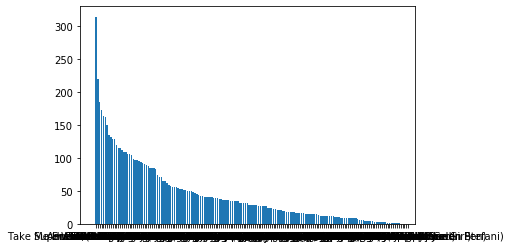

In [21]:
x = music_df['Name']
y = music_df['Plays']

plt.bar(x, y, width = .8, align='center')

In [22]:
#This shows skew in the amount of plays, log transform

music_df['LogPlays'] = music_df['Plays'].apply(np.log)
music_df.head()

,Name,Artist,Genre,Year,Date Added,Last Played,Plays,LogPlays
0,Santeria,Sublime,Alternative,1996.0,2012-05-11,2020-07-28,314.0,5.749393
1,Take On Me,a-ha,Pop,1985.0,2018-09-10,2020-07-09,220.0,5.393628
2,Take On Me,a-ha,Pop,1985.0,2018-09-10,2020-07-09,220.0,5.393628
3,Cliffs of Dover,Eric Johnson,Rock,1990.0,2017-08-16,2020-08-02,184.0,5.214936
4,What I'm Here 4,Gang Starr,Hip-Hop/Rap,1998.0,2016-12-02,2020-08-02,172.0,5.147494


<BarContainer object of 171 artists>

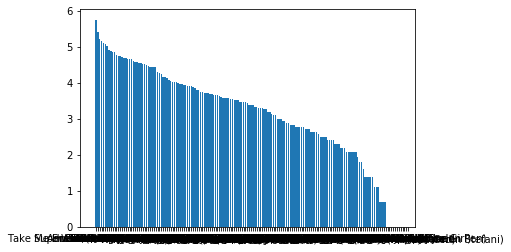

In [23]:
x = music_df['Name']
y = music_df['LogPlays']

plt.bar(x, y, width = .8, align='center')

### Fixes the left skew of previous plot

#### The song names are unreadable, but thats okay for now

### Rating Metric:

#### Personally, I never rate music/movies with stars, even if I love them. The way I show my love for songs is listening to them way too many times. 
#### I will use log number of plays as my rating.

In [26]:
m = music_df['LogPlays'].mean()

In [30]:
#I will consider only songs with more than 3.22 log plays for simplicity

top_plays = music_df.copy().loc[music_df['LogPlays'] >= m]
top_plays.head()

,Name,Artist,Genre,Year,Date Added,Last Played,Plays,LogPlays
0,Santeria,Sublime,Alternative,1996.0,2012-05-11,2020-07-28,314.0,5.749393
1,Take On Me,a-ha,Pop,1985.0,2018-09-10,2020-07-09,220.0,5.393628
2,Take On Me,a-ha,Pop,1985.0,2018-09-10,2020-07-09,220.0,5.393628
3,Cliffs of Dover,Eric Johnson,Rock,1990.0,2017-08-16,2020-08-02,184.0,5.214936
4,What I'm Here 4,Gang Starr,Hip-Hop/Rap,1998.0,2016-12-02,2020-08-02,172.0,5.147494


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel 

In [38]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(music_df['Genre'].values.astype('U'))

In [42]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)
results = {}
for idx, row in music_df.iterrows():
   similar_indices = cosine_similarities[idx].argsort()[:-100:-1] 
   similar_items = [(cosine_similarities[idx][i], music_df['Name'][i]) for i in similar_indices] 
   results[row['Name']] = similar_items[1:]

In [58]:
def item(id):  
  return music_df.loc[music_df['Name'] == id]['Name'].tolist()[0].split(' - ')[0] # Just reads the results out of the dictionary.
def recommend(item_id, num):
  print("Recommending " + str(num) + " products similar to " + item(item_id) + "...")
  print("-------")
  recs = results[item_id][:num]
  for rec in recs:
    print("Recommended: " + item(rec[1]) + " (score:" +      str(rec[0]) + ")")

In [60]:
recommend(item_id='Killer Queen', num=5)

Recommending 5 products similar to Killer Queen...
-------
Recommended: The Spirit of Radio (score:1.0)
Recommended: One Headlight (score:1.0)
Recommended: Carry On Wayward Son (score:1.0)
Recommended: Into the Mystic (score:1.0)
Recommended: Up Around the Bend (score:1.0)


### This just recommends based on genre

### In the future, I plan to find out how to calculate a similarity matrix when taking multiple variables into account.